In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

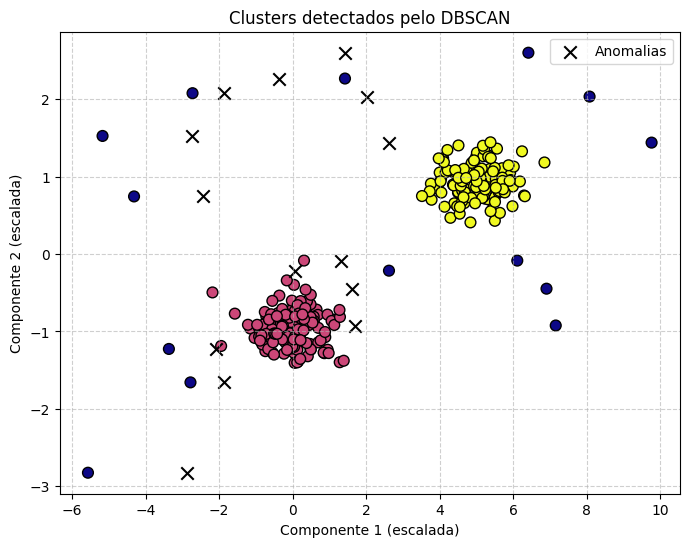

In [13]:
# 1. Gerar dados de exemplo
X, _ = make_blobs(
    n_samples = 300,
    centers = [(0,0), (5,5)],
    cluster_std = 0.6,
    random_state = 42
)

# Adicionar alguns outliers (anomalias)
outliers = np.random.uniform(low = -6, high = 10, size = (15,2))
X = np.vstack((X, outliers))

# Padronizar
X_scaled = StandardScaler().fit_transform(X)

# 2. Aplicar o DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
labels = dbscan.fit_predict(X_scaled)

# 3. Plotar resultado
plt.figure(figsize=(8,6))

# Cada cluster recebe uma cor diferente
plt.scatter(X[:,0], X_scaled[:,1],
            c=labels, cmap='plasma', s=60, edgecolors='k')

# Destacar as anomalias (label = -1)
plt.scatter(X_scaled[labels == -1, 0],
            X_scaled[labels == -1, 1],
            c = 'black', marker = 'x', s = 80, label = 'Anomalias'
            )

plt.title("Clusters detectados pelo DBSCAN")
plt.xlabel("Componente 1 (escalada)")
plt.ylabel("Componente 2 (escalada)")
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.6)
plt.show()

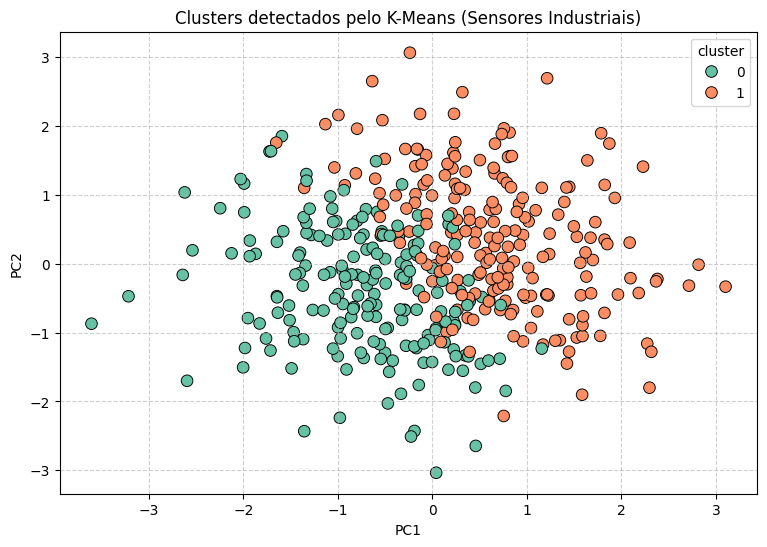

Peso de Cada Variável
     temperatura  vibracao  corrente   pressao
PC1    -0.609071  0.688065  0.282243  0.275568
PC2     0.503965  0.053053  0.125460  0.852915


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset Simulado
np.random.seed(42)
n = 400

dados = pd.DataFrame({
    "temperatura": np.random.normal(70, 4, n),
    "vibracao": np.random.normal(2.5, 0.3, n),
    "corrente": np.random.normal(12, 1, n),
    "pressao": np.random.normal(4, 0.4, n)
})

# Padronizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dados)

# 2. Aplicar com K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)

# 3. PCA para plotar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

dados["PC1"] = X_pca[:, 0]
dados["PC2"] = X_pca[:, 1]
dados["cluster"] = labels

# 4. Gráfico
plt.figure(figsize=(9, 6))
sns.scatterplot(data=dados, x="PC1", y="PC2", hue="cluster", palette="Set2", s=70, edgecolor = "k")

plt.title("Clusters detectados pelo K-Means (Sensores Industriais)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha = 0.6)
plt.show()

# Recuperar os nomes das colunas originais (antes do PC1, PC2 e cluster)
colunas_originais = ["temperatura", "vibracao", "corrente", "pressao"]

# Criar um dataframe pra vizualizar os pesos
df_pesos = pd.DataFrame(
    pca.components_,
    columns=colunas_originais,
    index=["PC1", "PC2"]
)

print("Peso de Cada Variável")
print(df_pesos)
